<a href="https://colab.research.google.com/github/SarahMason2015/Billionaires/blob/James_wk1/BillionairesDataML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from pathlib import Path
from sklearn.linear_model import LinearRegression


In [47]:
from billionairesdatacleaning import *

# Linear Regression with Billionaires, Company foundings

In [48]:
billionaires_df = pd.read_csv("billionaires.csv")
billionaires_df.head(10)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,...,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,True,True
6,Oeri Hoffman and Sacher,3,1996,1896,F. Hoffmann-La Roche,NaN,pharmaceuticals,new,0,NaN,...,3.300000e+11,Europe,inherited,13.1,New Sectors,True,Technology-Medical,3rd generation,True,True
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48,male,...,1.060000e+13,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited,True,True
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,...,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68,male,...,1.600000e+11,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited,True,True


In [49]:
billionaires_df.rename(columns={'company.founded':'co_founded', 'wealth.worth in billions':'wealth_bb'}, inplace=True)
billionaires_df.head(5)

,name,rank,year,co_founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth_bb,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


In [50]:
billionaires_df['co_founded'].value_counts()


1962    57
1995    54
1972    51
1993    48
1969    48
        ..
1789     1
1848     1
1863     1
1900     1
1907     1
Name: co_founded, Length: 178, dtype: int64

In [51]:
billion_com_clean = billionaires_df[billionaires_df.co_founded !=0]
# ref: https://www.codegrepper.com/code-examples/python/delete+row+with+zero+value+in+a+column+pyton

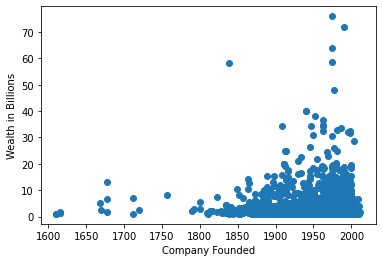

In [52]:
#from 17.2.3
plt.scatter(billion_com_clean.co_founded, billion_com_clean.wealth_bb)
plt.xlabel('Company Founded')
plt.ylabel('Wealth in Billions')
plt.show()

In [53]:
model = LinearRegression()

In [54]:
X = billion_com_clean.co_founded.values.reshape(-1, 1)
y = billion_com_clean.wealth_bb

In [55]:
model.fit(X,y)

LinearRegression()

In [56]:
y_pred= model.predict(X)
print(y_pred.shape)

(2574,)


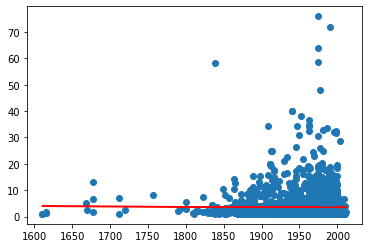

In [57]:
plt.scatter(X,y)
plt.plot(X, y_pred, color = 'red')
plt.show()
#All that work for nothing! At least I got to experiment with Linear Regression 

# Logistic Regression to Predict Aires vs Heirs

In [58]:
billion_df.head(5)

,demographics.age,demographics.gender,location.citizenship,location.region,wealth.how.industry,wealth.how.inherited
0,40,male,United States,North America,Technology,not inherited
1,45,male,United States,North America,Technology,not inherited
2,58,male,United States,North America,Technology,not inherited
3,65,male,United States,North America,Consumer,not inherited
4,70,male,United States,North America,Consumer,not inherited


In [59]:


from sklearn.preprocessing import LabelEncoder

In [60]:
#17.6.3
le = LabelEncoder()

In [61]:
billion2df = billion_df.copy()
billion2df['demographics.gender'] = le.fit_transform(billion2df['demographics.gender'])
billion2df.head(5)

,demographics.age,demographics.gender,location.citizenship,location.region,wealth.how.industry,wealth.how.inherited
0,40,1,United States,North America,Technology,not inherited
1,45,1,United States,North America,Technology,not inherited
2,58,1,United States,North America,Technology,not inherited
3,65,1,United States,North America,Consumer,not inherited
4,70,1,United States,North America,Consumer,not inherited


In [62]:
billion2df['location.region'] = le.fit_transform(billion2df['location.region'])
billion2df['wealth.how.industry'] = le.fit_transform(billion2df['wealth.how.industry'])
billion2df['wealth.how.inherited'] = le.fit_transform(billion2df['wealth.how.inherited'])
billion2df.head(5)


,demographics.age,demographics.gender,location.citizenship,location.region,wealth.how.industry,wealth.how.inherited
0,40,1,United States,4,8,1
1,45,1,United States,4,8,1
2,58,1,United States,4,8,1
3,65,1,United States,4,1,1
4,70,1,United States,4,1,1


In [63]:
billion_encoded = billion2df.drop(['location.citizenship'], axis = 1)

In [64]:
billion_encoded.head(5)

,demographics.age,demographics.gender,location.region,wealth.how.industry,wealth.how.inherited
0,40,1,4,8,1
1,45,1,4,8,1
2,58,1,4,8,1
3,65,1,4,1,1
4,70,1,4,1,1


In [65]:
billion_encoded.to_csv("billion_encoded.csv")

In [66]:
y = billion_encoded['wealth.how.inherited']
y

0       1
1       1
2       1
3       1
4       1
       ..
2609    1
2610    1
2611    1
2612    1
2613    1
Name: wealth.how.inherited, Length: 2614, dtype: int64

In [67]:
X = billion_encoded.drop(['wealth.how.inherited'], axis = 1)

In [68]:
from sklearn.preprocessing import StandardScaler
# data_scaler = StandardScaler()
# billions_caled = data_scaler.fit_transform(X)

In [69]:
#billions_caled[:5]

# Data is now scaled. Ready for ML Models

In [70]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [71]:
#Split data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [72]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [73]:
#Start with a Decision Tree
model = tree.DecisionTreeClassifier()


In [74]:
model = model.fit(X_train_scaled, y_train)

In [75]:
predictions = model.predict(X_test_scaled)

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [77]:
cm = confusion_matrix(y_test, predictions)

In [78]:
cm_df = pd.DataFrame(cm, index=["Actual Inherited", "Actual Earned"], columns=["Predicted Inherited", "Predicted Earned"])
cm_df

,Predicted Inherited,Predicted Earned
Actual Inherited,114,113
Actual Earned,135,292


In [79]:
decision_tree = accuracy_score(y_test, predictions)
decision_tree

0.6207951070336392

In [80]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {decision_tree}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Inherited,Predicted Earned
Actual Inherited,114,113
Actual Earned,135,292


Accuracy Score : 0.6207951070336392
Classification Report
              precision    recall  f1-score   support

           0       0.46      0.50      0.48       227
           1       0.72      0.68      0.70       427

    accuracy                           0.62       654
   macro avg       0.59      0.59      0.59       654
weighted avg       0.63      0.62      0.62       654



In [81]:
#Analysis. Precision of 0.46 means we weren't really able to predict the inherited, although the model predicted earned quite well, 0.72
#Recall score shows that 51% of the total inherited were predicted with our model. Not much. A higher number of earned

# Let's Try Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

In [84]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [85]:
rf_predictions = rf_model.predict(X_test_scaled)

In [86]:
rf_cm = confusion_matrix(y_test, rf_predictions)

In [87]:
rf_cm_df = pd.DataFrame(rf_cm, index=["Actual Inherited", "Actual Earned"], columns=["Predicted Inherited", "Predicted Earned"])
rf_cm_df

,Predicted Inherited,Predicted Earned
Actual Inherited,110,117
Actual Earned,84,343


In [88]:
random_forest = accuracy_score(y_test, rf_predictions)
random_forest

0.6926605504587156

In [89]:
# Displaying results
print("Confusion Matrix")
display(rf_cm_df)
print(f"Accuracy Score : {random_forest}")
print("Classification Report")
print(classification_report(y_test, rf_predictions))

Confusion Matrix


,Predicted Inherited,Predicted Earned
Actual Inherited,110,117
Actual Earned,84,343


Accuracy Score : 0.6926605504587156
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.48      0.52       227
           1       0.75      0.80      0.77       427

    accuracy                           0.69       654
   macro avg       0.66      0.64      0.65       654
weighted avg       0.68      0.69      0.69       654



In [90]:
#ANALYSIS: RandomForest Classifier had higher precision on the inherited and earned billionaires. The accuracy scores was more than 6 pts higher

# Try oversampling to even out Inherited/Earned

In [91]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

In [92]:
ros = RandomOverSampler(random_state=1)
Counter(y_train)

Counter({0: 699, 1: 1261})

In [93]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)
#This shows that we have oversampled the inherited count to better compare it with the earners

Counter({0: 1261, 1: 1261})

In [94]:
os_model = LogisticRegression(solver='lbfgs', random_state=1)
os_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [95]:
y_pred = os_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[132,  95],
       [128, 299]])

In [96]:
balanced_accuracy_score(y_test, y_pred)

0.6408659946971494

In [97]:
oversampling = balanced_accuracy_score(y_test, y_pred)

In [98]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.51      0.58      0.70      0.54      0.64      0.40       227
          1       0.76      0.70      0.58      0.73      0.64      0.41       427

avg / total       0.67      0.66      0.62      0.66      0.64      0.41       654



In [99]:
#ANALYSIS: lower precision but higher recall of inherited. Overall slightly lower balanced accuracy score after oversampling.
#The F1-score, which balances both precision & recall is the highest of any tests, however.

In [100]:
#Reset samples
X_resampled = 0
y_resampled = 0

# Using SMOTE

In [101]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)

In [102]:
Counter(y_resampled)

Counter({0: 1261, 1: 1261})

In [103]:
sm_model = LogisticRegression(solver='lbfgs', random_state=1)
sm_model.fit(X_resampled, y_resampled)

y_pred = sm_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.54      0.54      0.76      0.54      0.64      0.40       227
          1       0.76      0.76      0.54      0.76      0.64      0.42       427

avg / total       0.68      0.68      0.62      0.68      0.64      0.41       654



In [104]:
balanced_accuracy_score(y_test, y_pred)

0.6503162108347347

In [105]:
smote = balanced_accuracy_score(y_test, y_pred)

In [106]:
#Reset samples
X_resampled = 0
y_resampled = 0

# Undersampling Model

In [107]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 1261, 1: 1261})

In [108]:
us_model = LogisticRegression(solver='lbfgs', random_state=1)
us_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [109]:
y_pred = us_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[132,  95],
       [128, 299]])

In [110]:
balanced_accuracy_score(y_test, y_pred)

0.6408659946971494

In [111]:
undersampling = balanced_accuracy_score(y_test, y_pred)

In [112]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.51      0.58      0.70      0.54      0.64      0.40       227
          1       0.76      0.70      0.58      0.73      0.64      0.41       427

avg / total       0.67      0.66      0.62      0.66      0.64      0.41       654



In [113]:
#ANALYSIS: Same as oversampling, with the same F1 score for inherited, slightly lower predictive value for earned

In [114]:
X_resampled = 0
y_resampled = 0

# Cluster Centroid Undersampling

In [115]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [116]:
cc_model = LogisticRegression(solver='lbfgs', random_state=1)
cc_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [117]:
y_pred = cc_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[130,  97],
       [117, 310]])

In [118]:
balanced_accuracy_score(y_test, y_pred)

0.649341270414427

In [132]:
clustered_centroid_us = balanced_accuracy_score(y_test, y_pred)

In [120]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.53      0.57      0.73      0.55      0.64      0.41       227
          1       0.76      0.73      0.57      0.74      0.64      0.42       427

avg / total       0.68      0.67      0.63      0.68      0.64      0.42       654



In [121]:
#ANALYSIS: Higher precision in inherited (the model found a higher percentage of them) and higher recall in earned (the model found more of them )
# Still not close to the 69% accuracy of the Random Forest Model
X_resampled = 0
y_resampled = 0

# A Last Stab at Machine Learning with SMOTEENN

In [122]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [123]:
st_model = LogisticRegression(solver='lbfgs', random_state=1)
st_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [124]:
y_pred = st_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[133,  94],
       [120, 307]])

In [125]:
balanced_accuracy_score(y_test, y_pred)

0.6524363193677847

In [133]:
smoteenn =  balanced_accuracy_score(y_test, y_pred)

In [126]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.53      0.59      0.72      0.55      0.65      0.42       227
          1       0.77      0.72      0.59      0.74      0.65      0.43       427

avg / total       0.68      0.67      0.63      0.68      0.65      0.42       654



In [127]:
#ANALYSIS: I had thought the high number of true-positives in the confusion matrix would make this the best model
#but it was only marginally more accurate (+0.5%) than the previous model.
X_resampled = 0
y_resampled = 0

# Putting it all together


*## Accuracy Scores for the Models*

In [143]:
data = [['Random_Forest',0.6926605504587156],['Oversampling',0.6408659946971494],['SMOTE',0.6503162108347347],['Undersampling', 0.6408659946971494],['Cluster_Centroid_US',0.649341270414427],['SMOTEENN', 0.6524363193677847]]
chart_df = pd.DataFrame(data, columns = ['ML_Model','Accuracy'])
chart_df

,ML_Model,Accuracy
0,Random_Forest,0.692661
1,Oversampling,0.640866
2,SMOTE,0.650316
3,Undersampling,0.640866
4,Cluster_Centroid_US,0.649341
5,SMOTEENN,0.652436


In [146]:
x = chart_df['ML_Model']
y = chart_df['Accuracy']

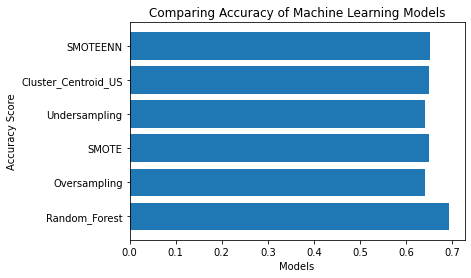

In [152]:
plt.barh(x, y, align='center', alpha = 1.0)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparing Accuracy of Machine Learning Models')
plt.show()

## Precision of Predictions for Billion-Heirs

In [157]:
precision = [['Random_Forest', 0.57],['Oversampling', 0.51],['SMOTE', 0.54],['Undersampling', 0.51],['Cluster_Centroid_US',0.53],['SMOTEENN', 0.53]]
precision_df = pd.DataFrame(precision, columns = ['ML_Model','Precision'])
precision_df

,ML_Model,Precision
0,Random_Forest,0.57
1,Oversampling,0.51
2,SMOTE,0.54
3,Undersampling,0.51
4,Cluster_Centroid_US,0.53
5,SMOTEENN,0.53


In [159]:
px = precision_df['ML_Model']
py = precision_df['Precision']

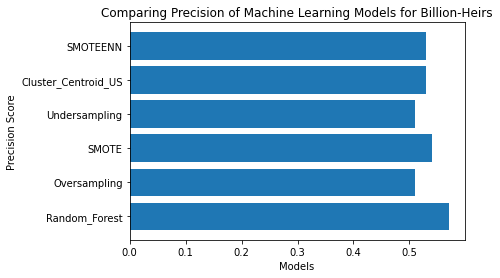

In [160]:
plt.barh(px, py, align='center', alpha = 1.0)
plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.title('Comparing Precision of Machine Learning Models for Billion-Heirs')
plt.show()

# Recall for Billion-Heirs

In [161]:
recall = [['Random_Forest', 0.48],['Oversampling', 0.58],['SMOTE', 0.54],['Undersampling', 0.58],['Cluster_Centroid_US', 0.57],['SMOTEENN',  0.59]]
recall_df = pd.DataFrame(recall, columns = ['ML_Model','Recall'])
recall_df

,ML_Model,Recall
0,Random_Forest,0.48
1,Oversampling,0.58
2,SMOTE,0.54
3,Undersampling,0.58
4,Cluster_Centroid_US,0.57
5,SMOTEENN,0.59


In [166]:
rx = recall_df['ML_Model']
ry = recall_df['Recall']

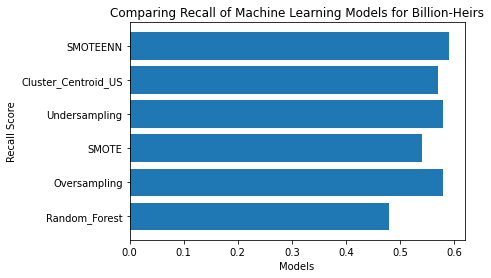

In [167]:
plt.barh(rx, ry, align='center', alpha = 1.0)
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.title('Comparing Recall of Machine Learning Models for Billion-Heirs')
plt.show()

## K-Means Clustering

In [134]:
import pandas as pd
import plotly.express as px
#import hvplot.pandas
from sklearn.cluster import KMeans
import holoviews as hv
from holoviews import opts

In [135]:
km_model = KMeans(n_clusters=2, random_state=5)
km_model

KMeans(n_clusters=2, random_state=5)

In [136]:
km_model.fit(billion_encoded)


KMeans(n_clusters=2, random_state=5)

In [137]:
predictions = km_model.predict(billion_encoded)
print(predictions)

[1 1 1 ... 1 1 1]
